In [1]:
from __future__ import division, print_function

import os
from builtins import input, range
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# re-size all the images to this
IMAGE_SIZE = [100, 100]

# training config
EPOCHS = 5
BATCH_SIZE = 32

In [3]:
train_path = '/Users/serdar/DATASETS/fruits/fruits-360/Training/'
valid_path = '/Users/serdar/DATASETS/fruits/fruits-360/Test'

image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g') 
print("# of image files: ", len(image_files))
print("# of validation image size :", len(valid_image_files))

# of image files:  60486
# of validation image size : 20618


In [4]:
# getting the number of classes (each folder is a different class) 
folders = glob(train_path + '/**')
print(len(folders))

# veya su sekilde bulabiliriz subfolder saysisini
sub_folders = sorted(os.listdir(train_path))
len(sub_folders)

120


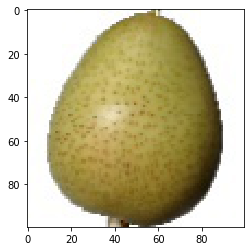

In [5]:
# look at an random image
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [6]:
# add preprocessing layer to the front of VGG
# [3] is for color dimension
# to exclude the last layer, we say include_top=False, wewill use our own classifier
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# NOT to train exisitng weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
# our layer starts here
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model
model = Model(inputs=vgg.input, outputs=prediction)

# model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

# test generator
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)

labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
    labels[v] = k

Found 20618 images belonging to 120 classes.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Dates': 35, 'Eggplant': 36, 'Ginger Root': 37, 'Granadilla': 38, 'Grape Blue': 39, 'Grape Pink': 40, 'Grape White': 41, 'Grape White 2': 42, 'Grape White 3': 43, 'Grape White 4': 44, 'Grapefruit Pink': 45, 'Grapefruit White': 46, 'Guava': 47, 'Hazelnut': 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -120.59561 max: 151.061


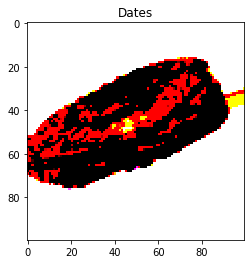

In [15]:
# VGG Caffe'de yazildigi icin RGB formatinda degil BRG color formatini kullanmistir.
# Bunu duzeltecegiz simdi yani RGB'ye donecegiz

for x, y in test_gen:
    # min ve max value degerleri 0-255 bandinin disinda ise uygun formatta oladigini anlayabiliriz
    print("min:", x[0].min(), "max:", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

In [16]:
# create generators
train_generator = gen.flow_from_directory(
                    train_path,
                    target_size=IMAGE_SIZE,
                    shuffle=True,
                    batch_size=BATCH_SIZE)

valid_generator = gen.flow_from_directory(
                    valid_path,
                    target_size=IMAGE_SIZE,
                    shuffle=True,
                    batch_size=BATCH_SIZE)

Found 60486 images belonging to 120 classes.
Found 20618 images belonging to 120 classes.


In [19]:
history = model.fit(
                train_generator,
                validation_data=valid_generator,
                epochs=EPOCHS,
                steps_per_epoch=len(image_files)//BATCH_SIZE,
                validation_steps=len(valid_image_files)//BATCH_SIZE)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1890 steps, validate for 644 steps
Epoch 1/5
1890/1890 [==============================] - 1222s 646ms/step - loss: 1.5321 - accuracy: 0.8979 - val_loss: 1.9296 - val_accuracy: 0.9071
Epoch 2/5
1890/1890 [==============================] - 1251s 662ms/step - loss: 0.5368 - accuracy: 0.9690 - val_loss: 1.7723 - val_accuracy: 0.9412
Epoch 3/5
1890/1890 [==============================] - 1245s 658ms/step - loss: 0.4251 - accuracy: 0.9790 - val_loss: 1.8302 - val_accuracy: 0.9422
Epoch 4/5
1890/1890 [==============================] - 1255s 664ms/step - loss: 0.3432 - accuracy: 0.9843 - val_loss: 1.8081 - val_accuracy: 0.9559
Epoch 5/5
1890/1890 [==============================] - 1234s 653ms/step - loss: 0.3006 - accuracy: 0.9868 - val_loss: 1.8773 - val_accuracy: 0.9592


In [24]:
def get_confusion_matrix(data_path, N):
    # we need to see teh data in the same order
    # for both predictions and targets
    
    print("[INFO] Generating Confusion Matrix")
    predictions = []
    targets = []
    i = 0
    for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=BATCH_SIZE*2):
        i += 1
        if i %50 == 0:
            print(i)
            
        p = model.predict(x)
        p = np.argmax(p, axis=1)
        y = np.argmax(y, axis=1)
        predictions = np.concatenate((targets, y))
        # if we don't break, it will be an inifinite loop
        if len(targets) >= N:
            break
            
    cm = confusion_matrix(targets, predictions)
    return cm
    

In [ ]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)

In [ ]:
valid_cm = get_confusion_martix(valid_path, len(valid_image_files))
print(valid_cm)

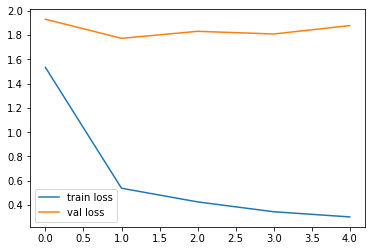

In [26]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

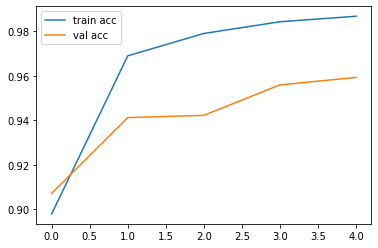

In [27]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

from util import plot_confusion_matrix
plot_confusion_matrix(cm, labels, title='Train Confusion Matrix')
plot_confusion_martix(valid_cm, labels, title='Validation Confusion Matrix')

120